<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity2023/blob/main/1002_mst_kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
if [[ ! -d utils ]]; then
    mkdir utils
    cd utils
    curl -O https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity2023/main/utils/graphs.py
    curl -O https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity2023/main/utils/disjointset.py
fi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1465  100  1465    0     0   6858      0 --:--:-- --:--:-- --:--:--  6877
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   602  100   602    0     0   2969      0 --:--:-- --:--:-- --:--:--  2980


In [3]:
from utils import graphs
from utils.disjointset import DisjointSet

In [4]:
%%file 1.graph
1 4 2 8 3 5 4 8
0 4 3 8 5 9 6 1
0 8 4 2 5 5 6 1
0 5 1 8 5 7 7 4
0 8 2 2 6 1 7 6
1 9 2 5 3 7
1 1 2 1 4 1
3 4 4 6

Writing 1.graph


In [48]:
with open('1.graph') as file:
    G = []
    for line in file:
        if line.startswith('-'):
            G.append([])
            continue
        nums = list(map(int, line.split()))
        G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])

    print(G)

[[(1, 4), (2, 8), (3, 5), (4, 8)], [(0, 4), (3, 8), (5, 9), (6, 1)], [(0, 8), (4, 2), (5, 5), (6, 1)], [(0, 5), (1, 8), (5, 7), (7, 4)], [(0, 8), (2, 2), (6, 1), (7, 6)], [(1, 9), (2, 5), (3, 7)], [(1, 1), (2, 1), (4, 1)], [(3, 4), (4, 6)]]


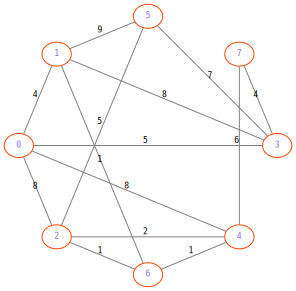

In [21]:
graphs.show(G, weighted=True, layout='circo')

In [17]:
import heapq

def kruskal(G):
    n = len(G)
    edges = []
    for u in range(n):
        for v, w in G[u]:
            heapq.heappush(edges, (w, u, v))

    ds = DisjointSet(n)
    mst = []
    while len(mst) < n - 1:
        _, u, v = heapq.heappop(edges)
        if not ds.sameset(u, v):
            ds.union(u, v)
            mst.append((u, v))

    path = [-1]*n
    for u, v in mst:
        if path[v] == -1:
            path[v] = u
        else:
            path[u] = v

    return path

In [18]:
path = kruskal(G)
path

[-1, 0, 6, 0, 6, 2, 1, 3]

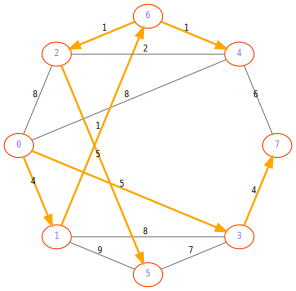

In [20]:
graphs.show(G, weighted=True, path=path, layout='circo')

## Exercice clustering

In [45]:
import heapq

def kruskal_cluster(G, k):
    n = len(G)
    edges = []
    for u in range(n):
        for v, w in G[u]:
            heapq.heappush(edges, (w, u, v))

    ds = DisjointSet(n)
    mst = []
    while len(mst) < n - k:
        _, u, v = heapq.heappop(edges)
        if not ds.sameset(u, v):
            ds.union(u, v)
            mst.append((u, v))

    path = [-1]*n
    for u, v in mst:
        if path[v] == -1:
            path[v] = u
        else:
            path[u] = v

    return path, ds

In [49]:
path, _ = kruskal_cluster(G, 3)
print(path)

[-1, 0, 6, -1, 6, -1, 1, 3]


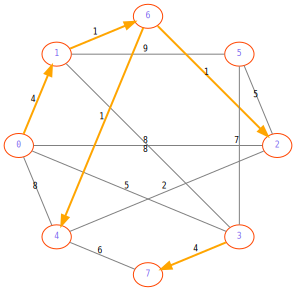

In [50]:
graphs.show(G, weighted=True, path=path, layout='circo')

In [31]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

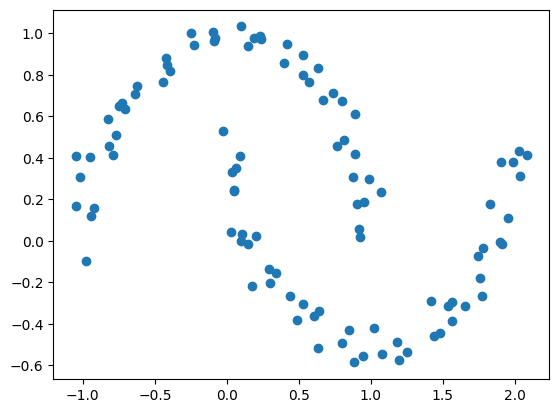

In [58]:
n = 100
data, labels = make_moons(n)
data = data + (np.random.random((n, 2))-0.5)*0.2
plt.scatter(data[:, 0], data[:, 1])

In [59]:
dist = lambda p, q: (sum((p-q)**2))**.5

p = np.array([0, 0])
q = np.array([3, 4])
assert dist(p, q) == 5

In [60]:
G = [[] for _ in range(n)]

for u, p in enumerate(data):
    for v, q in enumerate(data):
        if u == v: continue
        w = dist(p, q)
        G[u].append((v, w))
        G[v].append((u, w))


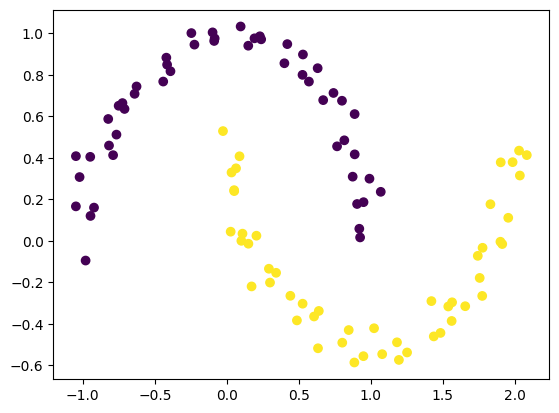

In [62]:
_, ds = kruskal_cluster(G, 2)
labels_ = [ds.find(x) for x in range(n)]
plt.scatter(data[:, 0], data[:, 1], c=labels_)

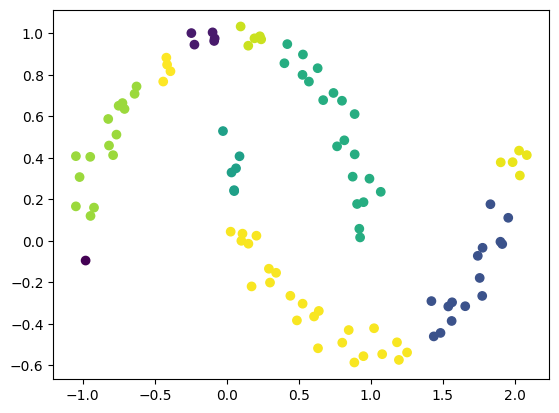

In [65]:
_, ds = kruskal_cluster(G, 10)
labels_ = [ds.find(x) for x in range(n)]
plt.scatter(data[:, 0], data[:, 1], c=labels_)